# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
# install necessary libraries 
!pip install tomotopy

In [2]:
!pip install little_mallet_wrapper

In [3]:
#import necessary libraries
import tomotopy as tp  #for topic modeling
import little_mallet_wrapper   #for topic modeling
import seaborn as sns #for data visualization 
import matplotlib.pyplot as plt #for data visualization
import glob   #for working with files and the file system.
from pathlib import Path   #for working with files and the file system.
import pandas as pd  #for analyzing and processing datasets

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [4]:
# Q2 (code)
# load the datasets of Sanders and Trump's tweets
Sanders = pd.read_csv('sanders_tweets.csv')
Trump = pd.read_csv('trump_tweets.csv')

In [5]:
#combine the two datasets
concatenated_df = pd.concat([Sanders, Trump], ignore_index=True)

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [6]:
# Q4 (code)
# Imports the Natural Language Toolkit (NLTK) library for natural language processing tasks (https://www.nltk.org/)
import nltk
from nltk.corpus import stopwords #Imports the stopwords corpus from NLTK
from nltk.tokenize import word_tokenize # for tokenizing text into words
import string  # Imports the string module for cleaning punctuation

In [7]:
nltk.download('stopwords') #Downloads the stopwords corpus.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chengluotong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english')) # Creates a set of English stopwords from NLTK's stopwords corpus.
punctuation = set(string.punctuation) # Creates a set of punctuation characters from the string module.

In [9]:
import re # for working with regular expressions (https://docs.python.org/3/library/re.html). 

def preprocess_text(text):
    # Remove URLs, user mentions, special characters, and numeric patterns
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump|[\W\d_]+", ' ', text, flags=re.MULTILINE)
    # Tokenize text
    tokens = word_tokenize(processed_text.lower())
    # Remove stopwords, punctuation, and numbers
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation and not token.isdigit()]
    # Join tokens back into text
    return ' '.join(filtered_tokens)

In [10]:
# Add the processed text to a list called training_data. 
training_data = [preprocess_text(content) for content in concatenated_df['Content']]
# Create a list with the content of the tweets (original_texts).
original_texts = list(concatenated_df['Content'])
# Creates a list of titles by concatenating the 'Username' and 'TweetId' columns for each row in the DataFrame df_concat.
titles = [f"{row['Username']}_{row['TweetId']}" for _, row in concatenated_df.iterrows()]

In [11]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [12]:
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 15

In [13]:
# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 500, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.178592708138295
Iteration: 10	Log-likelihood: -8.783665283352114
Iteration: 20	Log-likelihood: -8.613254196692546
Iteration: 30	Log-likelihood: -8.53609522556485
Iteration: 40	Log-likelihood: -8.487292611752677
Iteration: 50	Log-likelihood: -8.456685162260335
Iteration: 60	Log-likelihood: -8.436882129314732
Iteration: 70	Log-likelihood: -8.42148947675452
Iteration: 80	Log-likelihood: -8.407804896876488
Iteration: 90	Log-likelihood: -8.398029205810026
Iteration: 100	Log-likelihood: -8.389166911482022
Iteration: 110	Log-likelihood: -8.382569618664569
Iteration: 120	Log-likelihood: -8.37537721471554
Iteration: 130	Log-likelihood: -8.371926844696338
Iteration: 140	Log-likelihood: -8.363293443791026
Iteration: 150	Log-likelihood: -8.361959841924211
Iteration: 160	Log-likelihood: -8.359103117196872
Iteration: 170	Log-likelihood: -8.356751967300115
Iteration: 180	Log-likelihood: -8.354061382694827
Iteration: 190	Log-likelihood: -8.3551

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [99]:
# Q5a (code)
# Print out top 15 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

rt trump fbi collusion russia witch hunt mueller amp campaign hillary obama clinton report comey

✨Topic 1✨

news fake amp media great people would even good much never like big many years

✨Topic 2✨

great vote thank state big amp endorsement total maga strong military complete amendment governor vets

✨Topic 3✨

tax workers people americans million working billion trump pay wage american class jobs need year

✨Topic 4✨

people health must care country right american trump americans war us need every stand america

✨Topic 5✨

china trade u jobs drug deal energy companies climate change must prices industry tariffs countries

✨Topic 6✨

rt realdonaldtrump president trump whitehouse thank live today america tonight new coronavirus american news teamtrump

✨Topic 7✨

border amp democrats people country want wall security must get great many states law would

✨Topic 8✨

great thank today amp rt honor president united states day north korea whitehouse fir

### Manually evaluate coherence
1. Topic 0 (high): The coherence is high because the keywords are tightly connected and represent a well-defined subject that is the investigation into alleged collusion between the Trump campaign and Russia.
2. Topic 1 (high): The coherence is high because the keywords consistently contribute to the discussion of media criticism and fake news.
3. Topic 2 (moderate): While the keywords in this topic generally relate to expressions of gratitude and endorsements, some terms like "strong," "military," "complete," "amendment," and "governor," "vets" may not directly align with the main theme.
4. Topic 3 (high): The coherence is high because all keywords are tightly connected and contribute to the discussion of economic concerns.
5. Topic 4 (moderate): The top keywords in this topic relate to healthcare, such as "health," "care," but some terms like "war" may not directly align with the main theme.
6. Topic 5 (high): All keywords are tightly connected and relate to the discussion of trade relations and economic deals.
7. Topic 6 (high): All keywords are related to the discussion of presidential updates and news.
8. Topic 7 (high): All keywords are tightly connected and contribute to the discussion of border security and immigration.
9. Topic 8 (high): The keywords in this topic are all related to expressions of gratitude and honors.
10. Topic 9 (high): The keywords generally relate to impeachment proceedings against President Trump, initiated by Democrats.

#### Q5b (words)
#### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

1. Topic 0: The key words suggest the theme of Trump administration ("trump") and Trump campaign's actions ("campaign"), particularly focusing on discussions related to the FBI, collusion allegations with Russia, the Mueller investigation often labeled as a "witch hunt," and the subsequent report ("fbi," "collusion," "russia," "witch," "hunt," "mueller," "report"). These discussions intertwine with mentions of key political figures such as Hillary Clinton, Barack Obama, and James Comey (""obama," "hillary," "clinton," "comey").
2. Topic 1: The topic suggests the discussions related to the media outlets ("media"), particularly focusing on the news and fake news ("news," "fake," "), reflecting the skepticism towards certain news sources. There might be a reflection on public perception, such as the positive sentiments towards certain groups or communities ("people," "great," "good"). 
3. Topic 2: This topic might concern the expressions of gratitude, political endorsements, and discussions related to the strength and support for particular candidates ("great," "vote," "thank," "endorsement"). There might be discussions about defense, legislation, or constitutional matters ("military," "amendment"). Mentions of "maga" (Make America Great Again) reflect alignment with a particular political movement or ideology. The word "governor" implies discussions related to gubernatorial races. Additionally, "vets" likely refers to veterans, perhaps indicating discussions of supporting or honoring military veterans.
4. Topic 3: This topic suggests the theme related to taxation, particularly focusing on Trump administration's policies concerning tax and job, and issues about social justice and equality ("tax," "workers," "job," "trump," "pay"). It might be about the distribution of wealth and the economic well-being of working-class Americans ("million," "billion," "wage," "worker," "class"). 
5. Topic 4: This topic delves into Trump's healthcare policies, related to the health and well-being of all individuals in the nation ("Trump," "people," "health," "care," "country"). It also explores fundamental rights, particularly the right to healthcare and the welfare of American citizens ("right," "American"). Moreover, discussions extend to Trump's approaches to national security ("war"). The discourse suggests a call for advocacy to tackle urgent national challenges, encouraging individuals to assert their rights and values in America ("need," "stand," "America").
6. Topic 5: This topic focuses on discussions surrounding trade relations with other countries, particularly concerning China ("China," "trade," "tariffs," "countries"). It also addresses economic matters such as job and the impact of trade deals on industries ("jobs," "deal," "industry"). Moreover, there's a focus on energy policies and climate change concerns ("energy," "climate," "change"). The discourse suggests a need for addressing issues related to drug prices and industry regulations ("drug," "prices," "industry"). 
7. Topic 6: This topic revolves around discussions related to president Trump's administration and White House activities ("realdonaldtrump," "president," "trump," "whitehouse," "teamtrump"). It also includes expressions of gratitude for various events ("thank," "live," "today," "america"). Additionally, there's a focus on news updates, particularly concerning the coronavirus pandemic and American news outlets ("coronavirus," "american," "news"). 
8. Topic 7: This topic indicates the discussions related to border security, immigration policies, and the construction of a border wall, particularly in the context of President Trump's agenda ("border," "democrats," "people," "country," "want," "wall," "security"). There's a emphasis on the need for enhanced security measures and stricter immigration laws to address concerns about border control and national security ("must," "get," "great," "many," "states," "law"). Additionally, there is perhpas endorsement of individuals and organizations aligned with these views, emphasizing their commitment to American values ("endorsement," "American," "patriots").
9. Topic 8: This topic centers on expressions of gratitude towards significant individuals and events, particularly in the context of the presidency ("great," "thank," "president," "united states"), reflecting a sense of pride and appreciation for American values and achievements ("honor," "today,"  "whitehouse," "happy"). Additionally, the discourse includes references to international engagements, such as diplomatic efforts with North Korea, highlighting efforts to promote peace and cooperation ("north," "korea").
10. Topic 9: This topic indicates discussions related to the impeachment proceedings against President Trump, initiated by Democrats ("impeachment," "democrats," "joe," "biden," "president," "trump," "election," "house," "senate," "vote," "schiff," "pelosi"). 




## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [166]:
# Initial coherence score (topic number is 10)
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5726098306104541 
Per Topic: [0.691302266716957, 0.5520007997751236, 0.6277907997369766, 0.6038874365389347, 0.5612899579107762, 0.6010743468999863, 0.5287463292479515, 0.508759132027626, 0.4597751062363386, 0.5914721310138702]



In [14]:
# Retrain the model (Change topic numbers: 15, 20, 25)
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 15

In [15]:
# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 500, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.385966823698237
Iteration: 10	Log-likelihood: -8.923385156136122
Iteration: 20	Log-likelihood: -8.718322627109425
Iteration: 30	Log-likelihood: -8.620576479779919
Iteration: 40	Log-likelihood: -8.55942679109607
Iteration: 50	Log-likelihood: -8.512128200048458
Iteration: 60	Log-likelihood: -8.475771824496768
Iteration: 70	Log-likelihood: -8.448979260020485
Iteration: 80	Log-likelihood: -8.42392008056806
Iteration: 90	Log-likelihood: -8.407198774340904
Iteration: 100	Log-likelihood: -8.394113376200815
Iteration: 110	Log-likelihood: -8.381906243290503
Iteration: 120	Log-likelihood: -8.36897028384813
Iteration: 130	Log-likelihood: -8.358532799516844
Iteration: 140	Log-likelihood: -8.351773590177217
Iteration: 150	Log-likelihood: -8.341685643269058
Iteration: 160	Log-likelihood: -8.336841658573336
Iteration: 170	Log-likelihood: -8.331526135768838
Iteration: 180	Log-likelihood: -8.329301055213993
Iteration: 190	Log-likelihood: -8.3228

In [191]:
# change topic nnumber to 15
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5861092356095711 
Per Topic: [0.7630014091730117, 0.5573180481791496, 0.7415271639823914, 0.5645576983690261, 0.5701584696769715, 0.5947525456547738, 0.5196511715650558, 0.5803201749920845, 0.6413601815700531, 0.42206575386226175, 0.5262949526309967, 0.6351992666721344, 0.4956062749028206, 0.5492878496646881, 0.630537573248148]



In [14]:
# change topic nnumber to 20
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.6175843353598613 
Per Topic: [0.6680230379104615, 0.5344989866018295, 0.5003725344897247, 0.6817477636039257, 0.6228441417217254, 0.5105482859537005, 0.5881504192948341, 0.6286770239472389, 0.7001628696918487, 0.7230782508850098, 0.5831381201744079, 0.6757219702005386, 0.5637017890810967, 0.6487540110945702, 0.5937380954623223, 0.7185159295797348, 0.5530730962753296, 0.7121400862932206, 0.6001658022403717, 0.5446344926953316]



In [197]:
# change topic nnumber to 25
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5839595552571119 
Per Topic: [0.6912006556987762, 0.7027029663324356, 0.630398827791214, 0.5793937008827925, 0.5436289981007576, 0.5678065568208694, 0.5458141386508941, 0.5608032792806625, 0.5658859848976135, 0.5222638741135597, 0.44452922865748407, 0.6721071869134903, 0.5321031212806702, 0.5617120527662337, 0.6039972335100174, 0.4868095278739929, 0.6769493222236633, 0.629034823179245, 0.6026954382658005, 0.58223547488451, 0.6827460721135139, 0.6223051562905312, 0.46164852008223534, 0.5068113319575787, 0.6234054088592529]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

#### Q6 (words)
- Initial number of topics: 10
- Initial average coherence score: 0.5726098306104541

For the initial experiment, this coherence score indicates a moderate level of coherence among the topics generated by the model.
##### Change topic numbers:
- Number of topics: 15
- Average coherence score: 0.5861092356095711

In the first modification, the number of topics was increased to 15. As a result, the average coherence score improved to 0.5861. This indicates a slight enhancement in the coherence of the topics compared to the initial experiment.

- Number of topics: 20
- Average coherence score: 0.6175843353598613

In the second modification, the number of topics was further increased to 20. This adjustment led to a higher average coherence score of 0.6176, indicating a more coherent topic model compared to the previous experiments.

- Number of topics: 25
- Average coherence score: 0.5839595552571119

In the final modification, the number of topics was increased to 25. However, this adjustment resulted in a slightly lower average coherence score of 0.5840 compared to the previous experiment with 20 topics.

##### Conclusion:
The experiments demonstrate that increasing the number of topics generally improves the coherence of the topics generated by the model. However, there may be diminishing returns or fluctuations in coherence scores as the number of topics increases beyond a certain threshold. In this case, the most coherent arrangement of topics was achieved with 20 topics, yielding the highest average coherence score of 0.6175843353598613.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

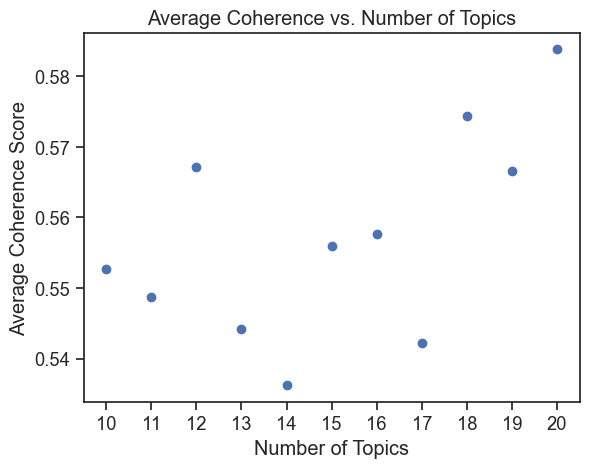

In [17]:
# define the function
def plot_coherence(start_topic_num, end_topic_num, training_data):
    average_coherence_list = [] # Initialize an empty list
    topics_num_list = range(start_topic_num, end_topic_num + 1) # This list contains the topic number range
    
    for topic_num in topics_num_list:  # Iterate over each topic number
        model = tp.LDAModel(k=topic_num)
        
        for tweet in training_data:
            model.add_doc(tweet.strip().split())
        
        iteration_num = 10 # Set the number of training iterations
        
        for i in range(0, iteration_num):
            model.train(iteration_num)
        
        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence_list.append(coh.get_score())
    
    plt.scatter(topics_num_list, average_coherence_list)
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score')
    plt.xticks(topics_num_list)  # Ensure integer ticks on x-axis
    plt.show()

# plot coherence scores for topic numbers from 10 to 20
plot_coherence(10, 20, training_data)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [17]:
# Retrieve topic distributions for all documents
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [20]:
# Print out top 15 words for each topic for the new topic model (topic = 20)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

wall street people debt education public must college free student need school criminal young big

✨Topic 1✨

great thank america today day country honor make american happy one women nation people men

✨Topic 2✨

law people amp rt police enforcement federal new city york state killed mayor attack u

✨Topic 3✨

election vote votes voting voter fraud people win republican ballots state states elections get mail

✨Topic 4✨

economy jobs record ever history years president best since year great unemployment trump time market

✨Topic 5✨

rt realdonaldtrump president whitehouse amp coronavirus american covid today trump live potus america help small

✨Topic 6✨

biden joe rt sleepy would amp bernie left party american mike democrats china radical america

✨Topic 7✨

news cnn rt foxnews fake amp fox ratings trump sanders watch media morning show like

✨Topic 8✨

great endorsement vote total strong complete military state amp amendment vets crime big governor

In [22]:
# Calculate the topic distributions for all tweets
# Create a list to store the results
topic_results = []

# Iterate over the titles and topic distributions
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

# Create a DataFrame from the results
df = pd.DataFrame(topic_results)

# Extract the topic words as column names
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]

# Split the topic distributions into separate columns
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index=df.index)

# Drop the 'topic_distribution' column
df = df.drop('topic_distribution', axis='columns')

# Display the DataFrame
df

,document,Topic 0 wall street people debt,Topic 1 great thank america today,Topic 2 law people amp rt,Topic 3 election vote votes voting,Topic 4 economy jobs record ever,Topic 5 rt realdonaldtrump president whitehouse,Topic 6 biden joe rt sleepy,Topic 7 news cnn rt foxnews,Topic 8 great endorsement vote total,...,Topic 10 rt trump realdonaldtrump president,Topic 11 rt democrats impeachment president,Topic 12 tax trump working republicans,Topic 13 workers wage pay million,Topic 14 fake news amp media,Topic 15 drug climate change must,Topic 16 people care health must,Topic 17 trump fbi rt collusion,Topic 18 great north president korea,Topic 19 border china u trade
0,SenSanders_1351670845639421952,0.001090,0.002958,0.001678,0.001284,0.001903,0.002372,0.001237,0.001074,0.001290,...,0.002541,0.002682,0.032002,0.899653,0.006067,0.001438,0.003445,0.002122,0.032025,0.002787
1,SenSanders_1351259762722279424,0.001555,0.004221,0.002395,0.001833,0.002716,0.003385,0.001765,0.001533,0.001842,...,0.003626,0.003827,0.088397,0.728613,0.008660,0.002053,0.133086,0.003028,0.002984,0.003978
2,SenSanders_1351242822293319680,0.002362,0.006413,0.003638,0.002784,0.004126,0.199865,0.002681,0.002329,0.002798,...,0.005509,0.005815,0.004483,0.003527,0.207878,0.003119,0.461821,0.069508,0.004533,0.006044
3,SenSanders_1350885541911400448,0.001433,0.318768,0.041566,0.001688,0.002502,0.003118,0.001626,0.001412,0.001697,...,0.003341,0.160966,0.002718,0.002139,0.007978,0.001891,0.319409,0.120870,0.002749,0.003665
4,SenSanders_1349880150041780224,0.001281,0.003478,0.001973,0.071916,0.002238,0.143602,0.071860,0.001263,0.001518,...,0.002988,0.038357,0.424869,0.142725,0.007135,0.036895,0.004051,0.002495,0.037662,0.003278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29208,@realDonaldTrump_1323141683014520837,0.002091,0.063126,0.003220,0.576960,0.003652,0.004552,0.002373,0.002062,0.002477,...,0.004876,0.005147,0.003968,0.003121,0.241443,0.002760,0.064061,0.004072,0.004012,0.005349
29209,@realDonaldTrump_1323143076605579268,0.002934,0.249771,0.488132,0.003458,0.005123,0.006386,0.003330,0.002892,0.003475,...,0.006841,0.007221,0.086169,0.004379,0.016338,0.003873,0.009276,0.005713,0.086231,0.007505
29210,@realDonaldTrump_1323143378750590982,0.001784,0.396872,0.345773,0.002102,0.003115,0.003883,0.002024,0.001758,0.002113,...,0.004159,0.053394,0.003384,0.002663,0.156944,0.002355,0.005639,0.003473,0.003422,0.004563
29211,@realDonaldTrump_1323143751250907136,0.001784,0.543884,0.002747,0.051106,0.003115,0.003883,0.002024,0.001758,0.002113,...,0.004159,0.004390,0.003384,0.002663,0.009933,0.002355,0.005639,0.003473,0.003422,0.347589


In [84]:
# Q7a (code)

## Sanders
# Select Sanders's topics to explore
selected_topics = [0, 12, 15, 16]

# Retrieve topic distributions for all documents
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [85]:
# Print top documents for each selected topic (Sanders)
for topic_id in selected_topics:
    print(f"Top documents for Topic {topic_id}:")
    # Sort documents based on probability of the selected topic
    top_documents = sorted(enumerate(topic_distributions), key=lambda x: x[1][topic_id], reverse=True)[:3] #get top 3 documents
    for doc_id, topic_dist in top_documents:
        print(f"Document {titles[doc_id]}: {training_data[doc_id]} (Probability: {topic_dist[topic_id]})")
    print()

Top documents for Topic 0:
Document SenSanders_1237385973429764096: nation effectively respond coronavirus million americans lack health insurance together need medicare (Probability: 0.9517654180526733)
Document SenSanders_1252338717278134272: big oil proven operate without causing health environmental economic crises job ensure oil workers health care pay pensions rapidly transition away fossil fuels (Probability: 0.9359925389289856)
Document SenSanders_1230870145536389120: real social progress country unless courage take wall street insurance companies drug companies military industrial complex fossil fuel industry prison industry forces greed (Probability: 0.9359925389289856)

Top documents for Topic 12:
Document SenSanders_1284971058815172608: trump proposed payroll tax cut would nothing million lost jobs pandemic taking money away social security instead must extend unemployment benefits provide month every working class american expand medicare (Probability: 0.9560122489929199)


In [86]:
## Trump
# Select Trump's topics to explore
selected_topics = [3, 4, 14, 17]

# Retrieve topic distributions for all documents
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [87]:
# Print top documents for each selected topic (Trump)
for topic_id in selected_topics:
    print(f"Top documents for Topic {topic_id}:")
    # Sort documents based on probability of the selected topic
    top_documents = sorted(enumerate(topic_distributions), key=lambda x: x[1][topic_id], reverse=True)[:3] #get top 3 documents
    for doc_id, topic_dist in top_documents:
        print(f"Document {titles[doc_id]}: {training_data[doc_id]} (Probability: {topic_dist[topic_id]})")
    print()

Top documents for Topic 3:
Document @realDonaldTrump_1257532110971318274: get even many failures see loser types care new federal judges great supreme court justices rebuilt military protected nd amendment biggest ever tax amp regulation cuts much use (Probability: 0.9519942402839661)
Document @realDonaldTrump_1316206550957125638: rt seitzer ufc gamebredfighter gives one best vote trump speeches heard (Probability: 0.9168820977210999)
Document @realDonaldTrump_1252260073839177728: last month heard radical left nothing democrats ventilators ventilators ventilators screamed loud amp clear amp thought us cold even though state task everyone got v many spare scream (Probability: 0.9137549996376038)

Top documents for Topic 4:
Document @realDonaldTrump_1037869794672799744: getting ready go stage matt rosendale great senator jon tester let people montana amp deserve another six years matt strong crime borders amp save second amendment onslaught loves military amp vets (Probability: 0.9572377

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [88]:
# Q7b (words)

**The topics have top tweets (top 3) only by one politician**
**Representative of Sanders:**
- Topic 0: Issues related to education, college debt, and public schooling, which are emphasized by Sanders.
- Topic 12: Addresses tax policies, social security, and middle-class cuts, aligning with Sanders' focus on income inequality and economic reforms.
- Topic 15: Addresses issues related to climate change, energy, and fossil fuels. Sanders is known for advocating to combat climate change and transition to renewable energy sources. 
- Topic 16: Discusses healthcare and ending wars, which are central themes in Sanders' platform. He is a advocate for universal healthcare in the speech "Don’t tell me we can’t provide a good health care system guaranteeing health care to all of our people."

**Representative of Trump:**
- Topic 3: Theme related to elections and voting. Trump discusses issues related to winning elections, voter fraud allegations, and the integrity of the electoral process.
- Topic 4: Discussions related to economy and job. Trump discusses trade deals with countries like China and Japan, emphasizes the need to bring back manufacturing jobs to the United States, and criticizes trade imbalances.
- Topic 14: Discussions related to "fake news" and media ratings, a recurring theme in Trump's discourse. He often criticizes mainstream media outlets.
- Topic 17: Trump often discusses topics related to investigations and collusion allegations during his presidency.

**Reference**
- Macaulay, M. (2019). Bernie and the Donald: A Comparison of Left- and Right-Wing Populist Discourse. In: Macaulay, M. (eds) Populist Discourse: International Perspectives. Palgrave Macmillan, Cham. 

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [89]:
# Crete a sample of tweets
from random import sample
# Set the number of tweets to sample
target_labels = sample(titles,100)

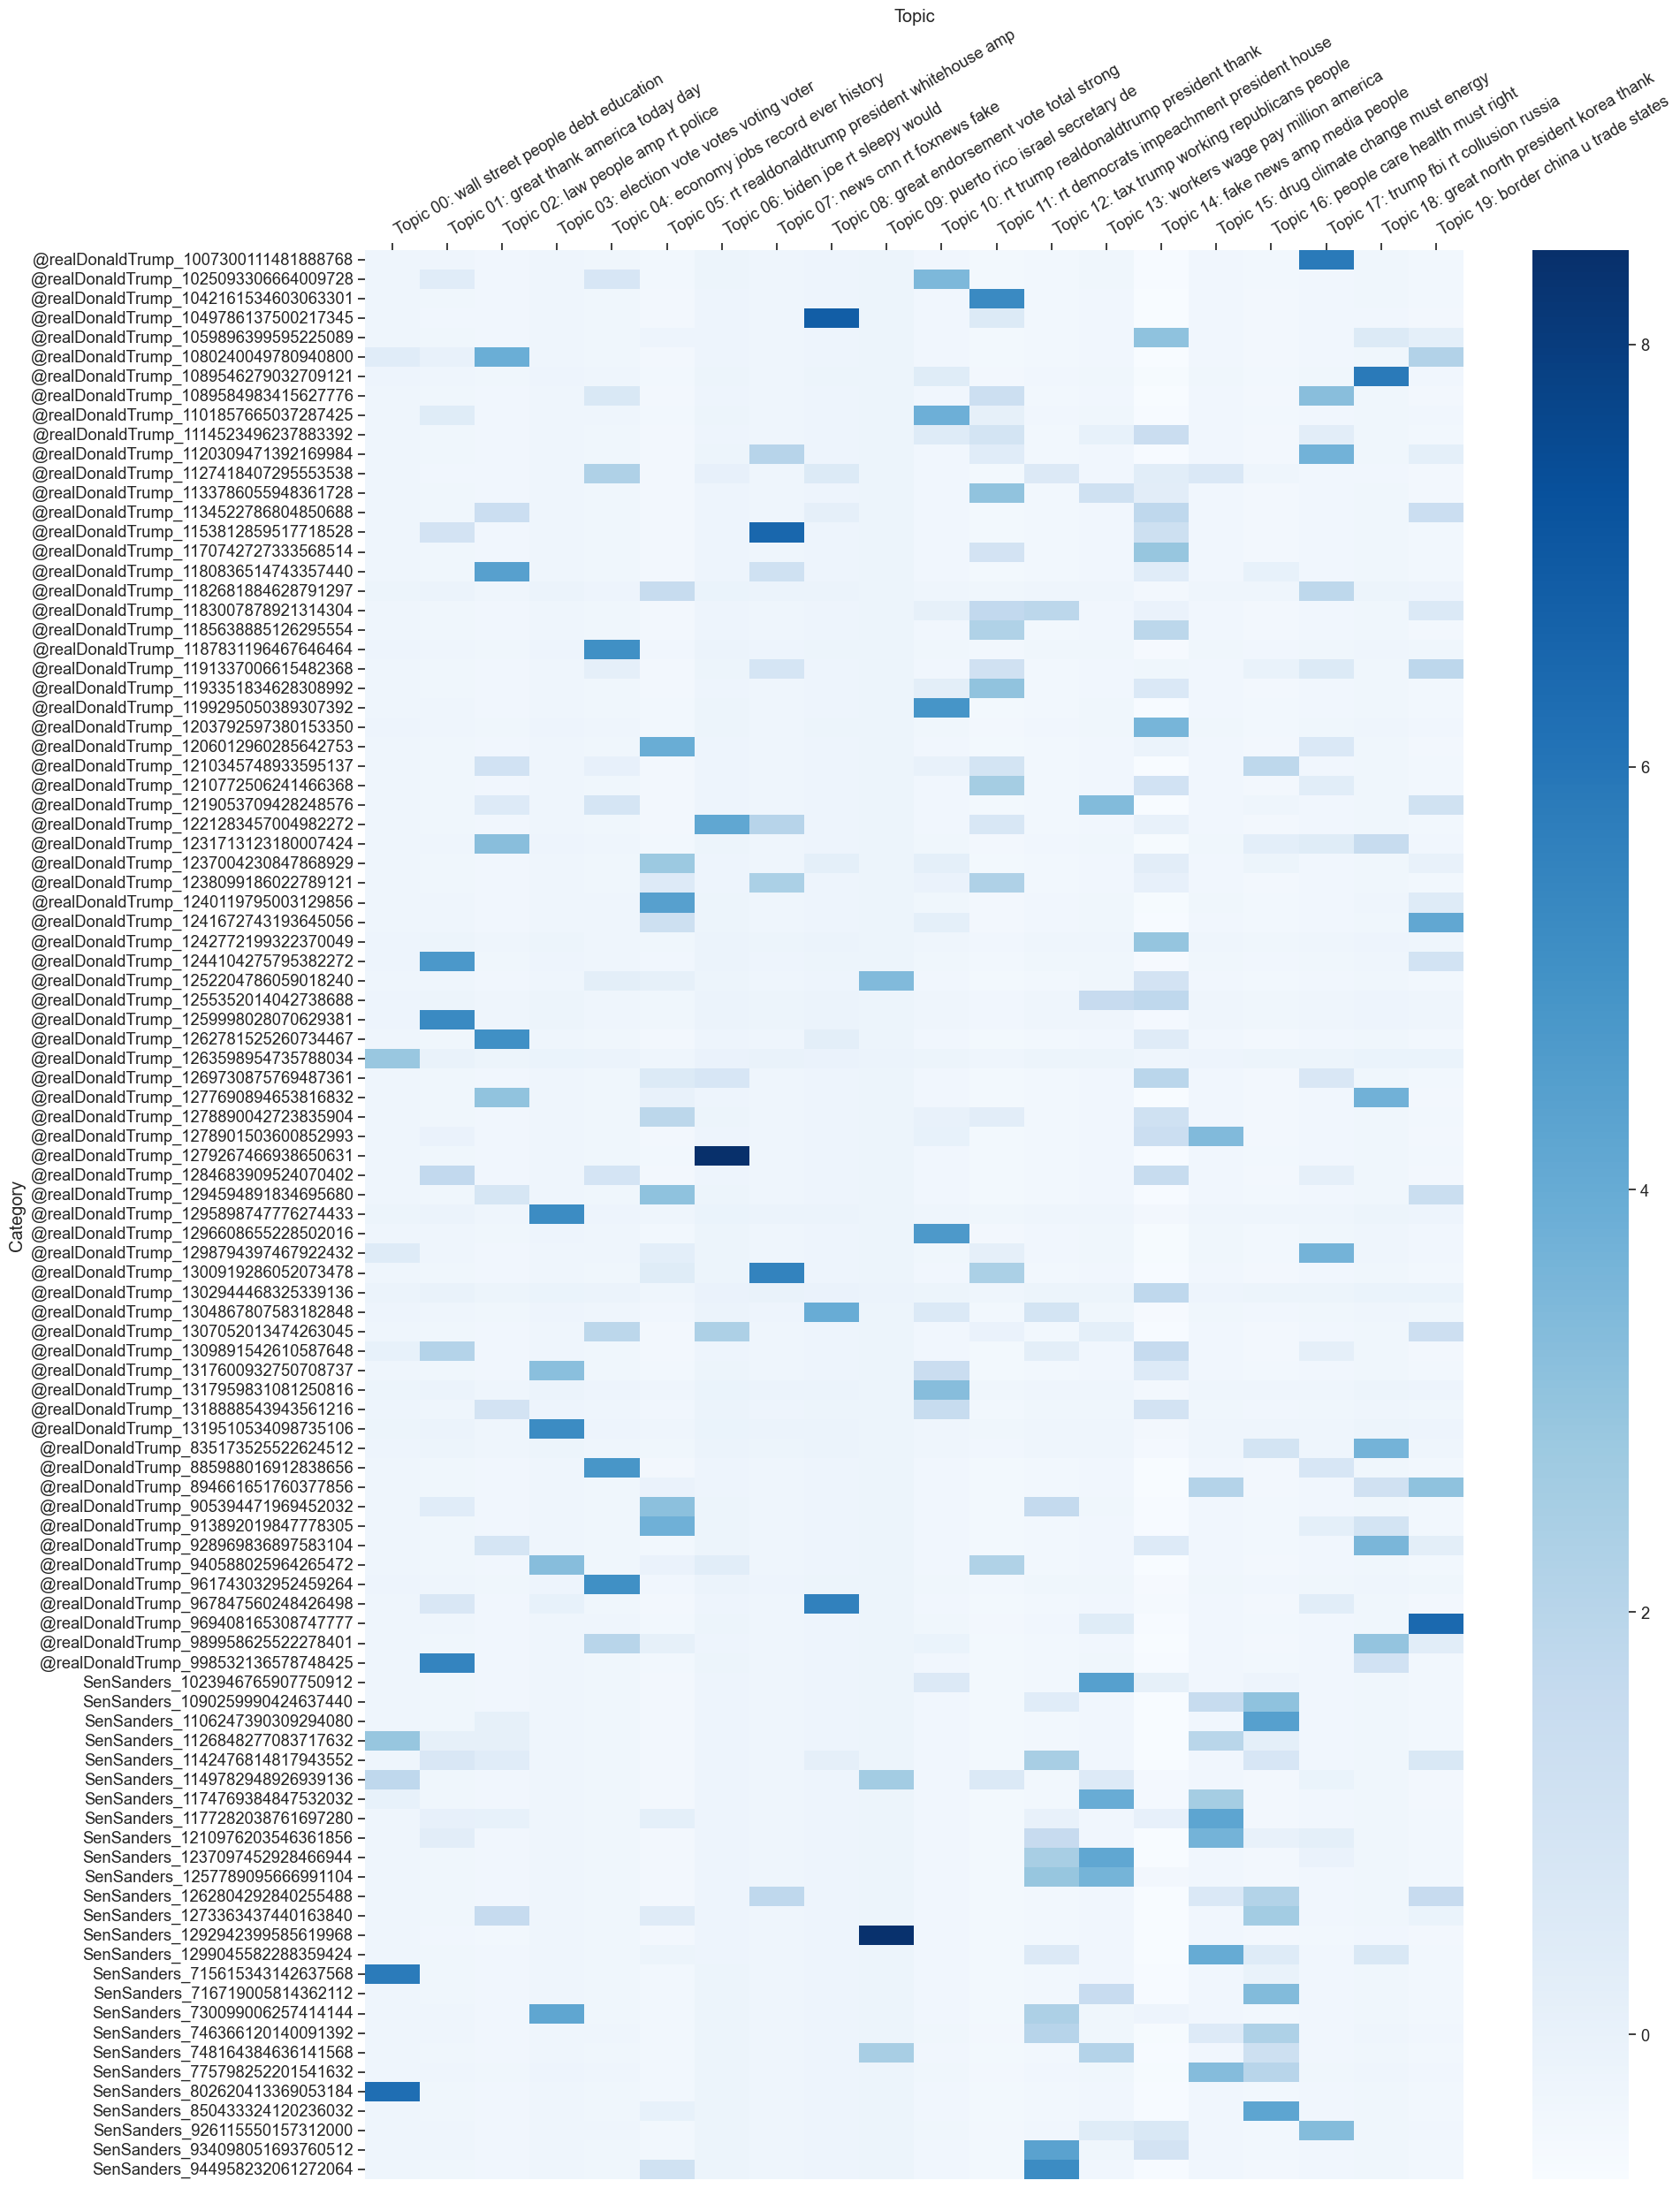

In [91]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map=sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

# Call the function to plot the heatmap
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map='Blues',
                                  dim=(20, 25))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

#### Q9 (words)
Topics 0, 12, 13, 15, and 16 appear to be more frequently discussed by Sanders. These topics revolve around issues such as education, college debt, healthcare, minimum wage, and climate change. Sanders' focus on these topics reflects his advocacy for progressive policies aimed at addressing economic inequality, healthcare accessibility, and environmental concerns.

On the other hand, topics 1, 2, 4, 5, 6, 7, 8, 10, 11, 14, 17, 18, and 19 are more prominently discussed by Trump. These topics cover a wide range of issues, such as patriotism, law enforcement, job and economy, and international relations. Trump's emphasis on these topics aligns with his campaign rhetoric.

Furthermore, Trump's speeches exhibit a distributed focus across various topics, indicating a broad spectrum of concerns addressed. In contrast, Sanders' speeches show a relatively more concentrated distribution, suggesting a narrower focus on specific policy areas.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [92]:
# X2 (code)

# Separate tweets by each candidate
Trump_tweets = [title for title in titles if 'Trump' in title]
Sanders_tweets = [title for title in titles if 'Sanders' in title]

# Sample 50 tweets from each candidate's tweets
Trump_sample = sample(Trump_tweets, 50)
Sanders_sample = sample(Sanders_tweets, 50)

# Combine the samples
balanced_sample = Trump_sample + Sanders_sample

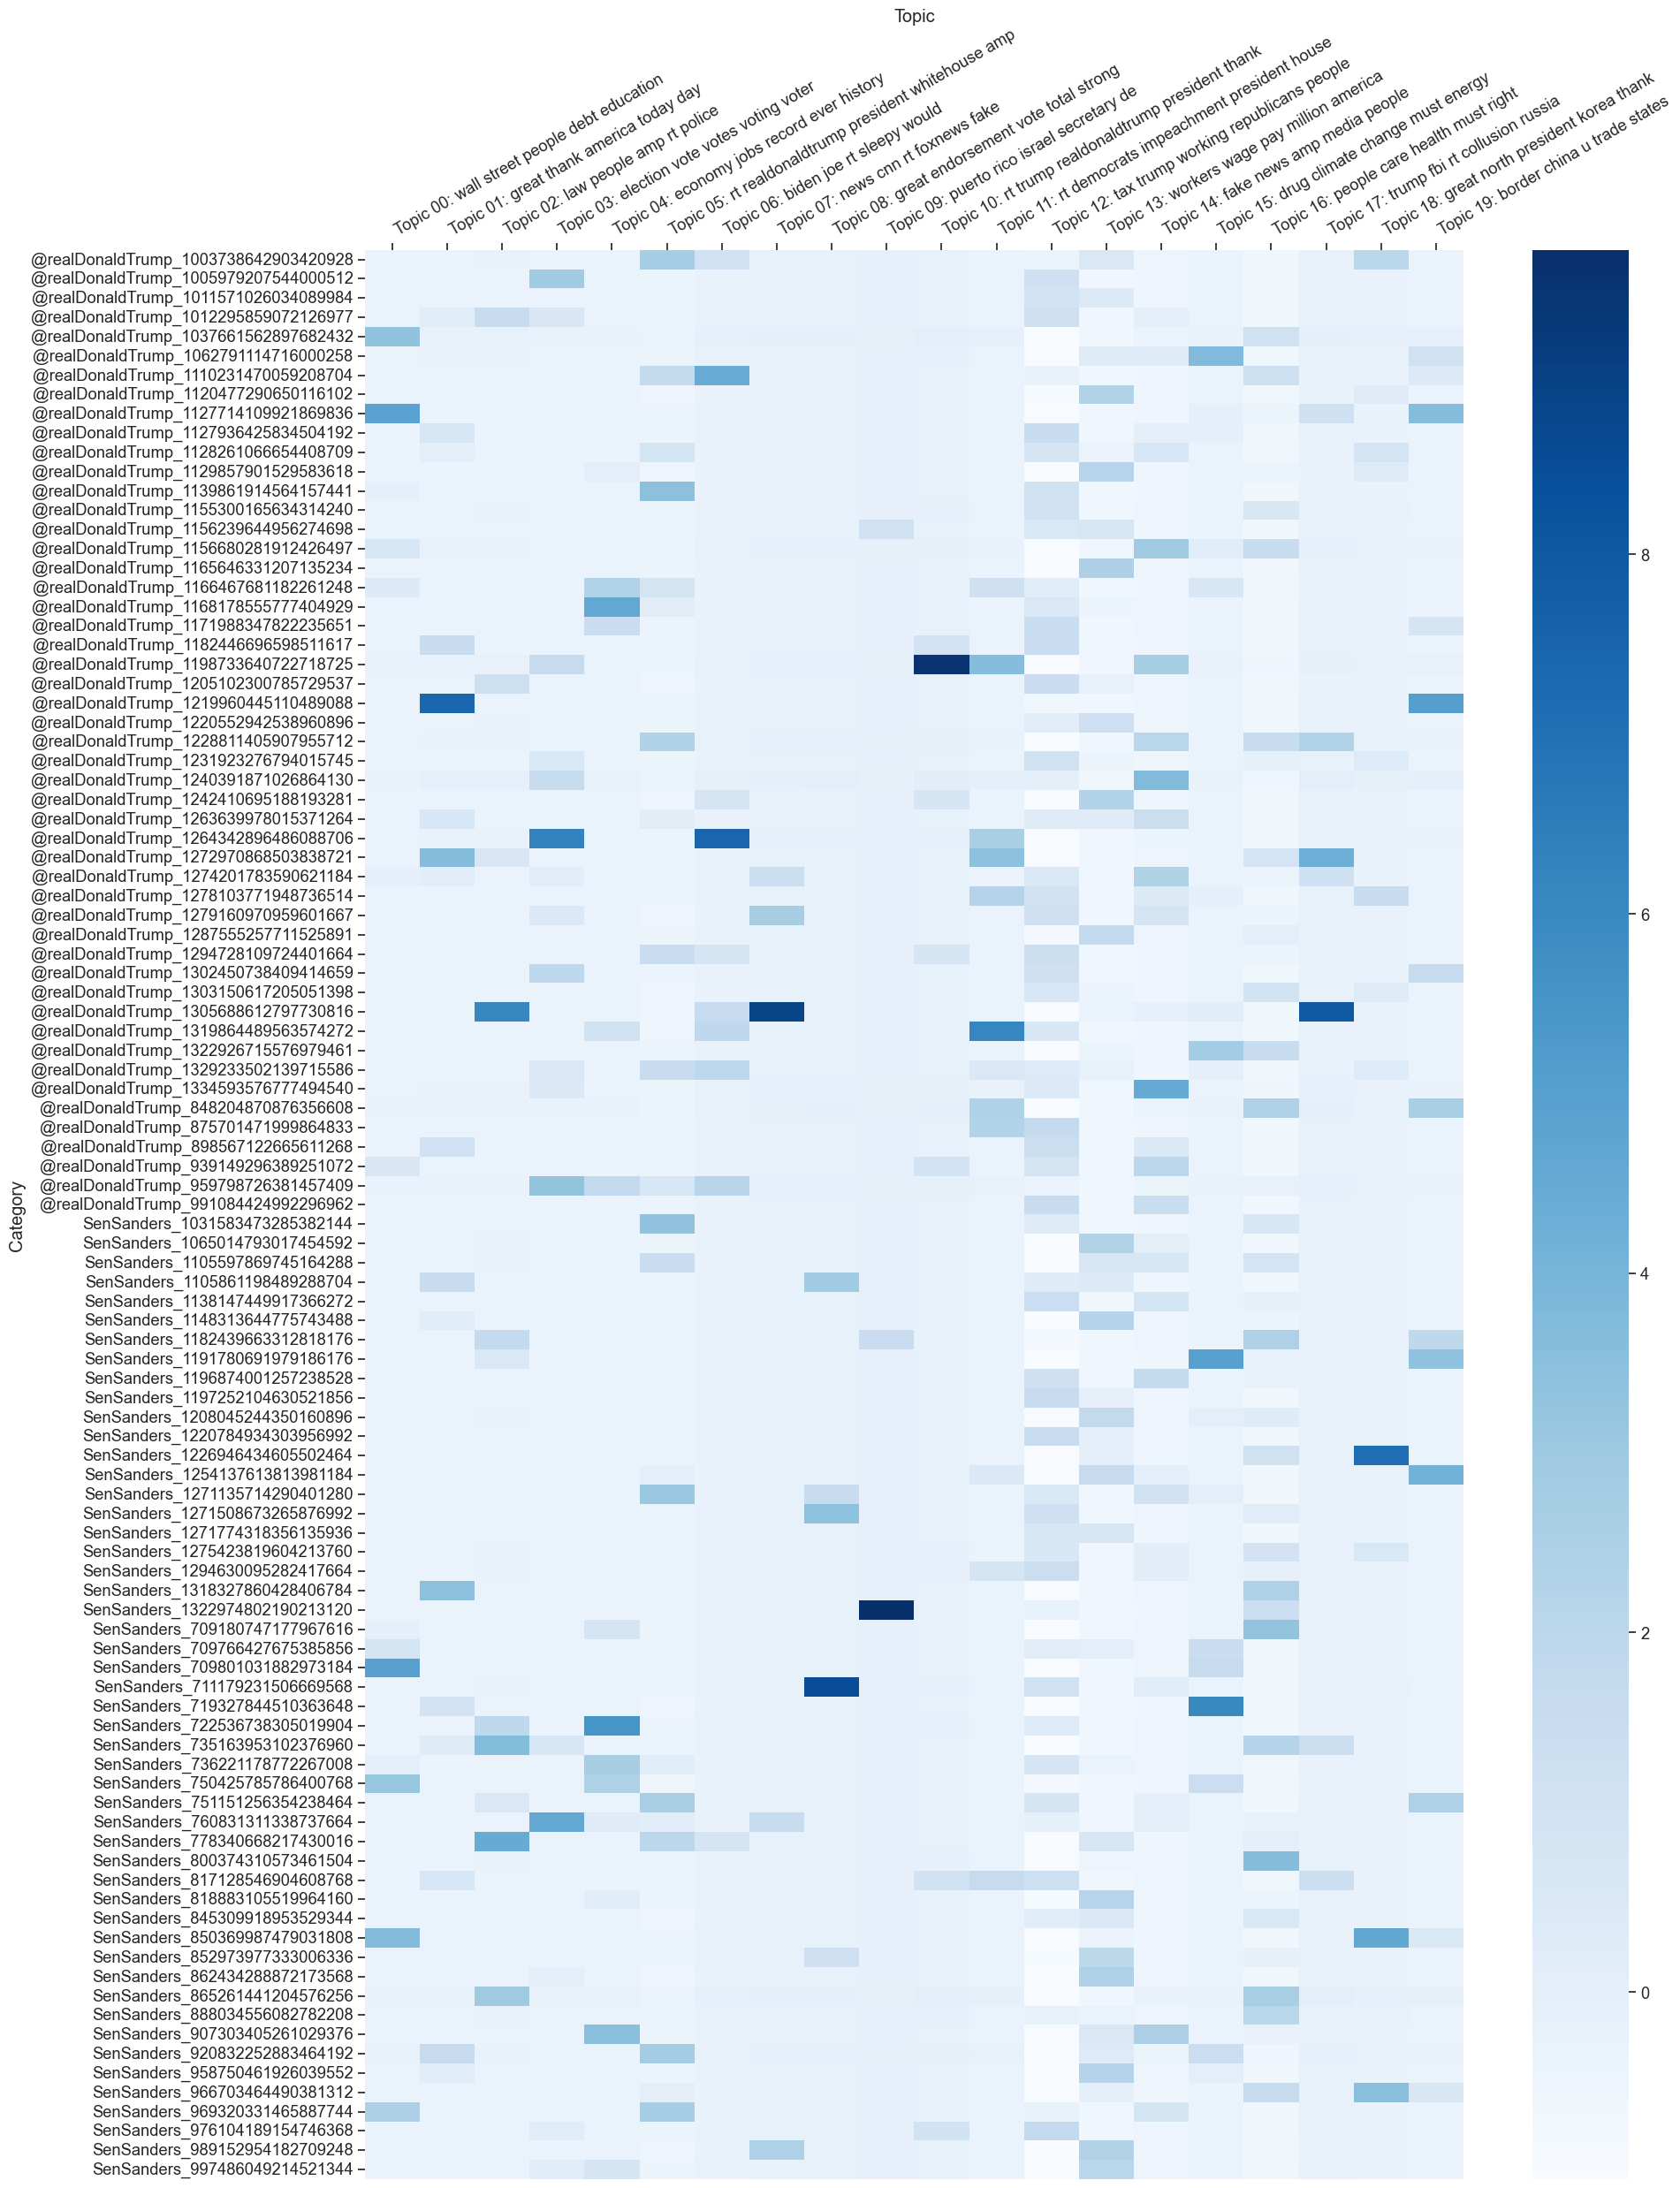

In [93]:
# Call the function to plot the heatmap with the balanced sample
plot_categories_by_topics_heatmap(balanced_sample,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=balanced_sample,
                                  color_map='Blues',
                                  dim=(20, 25))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

In [104]:
df

,document,Topic 0 wall street people debt,Topic 1 great thank america today,Topic 2 law people amp rt,Topic 3 election vote votes voting,Topic 4 economy jobs record ever,Topic 5 rt realdonaldtrump president whitehouse,Topic 6 biden joe rt sleepy,Topic 7 news cnn rt foxnews,Topic 8 great endorsement vote total,...,Topic 10 rt trump realdonaldtrump president,Topic 11 rt democrats impeachment president,Topic 12 tax trump working republicans,Topic 13 workers wage pay million,Topic 14 fake news amp media,Topic 15 drug climate change must,Topic 16 people care health must,Topic 17 trump fbi rt collusion,Topic 18 great north president korea,Topic 19 border china u trade
0,SenSanders_1351670845639421952,0.001090,0.002958,0.001678,0.001284,0.001903,0.002372,0.001237,0.001074,0.001290,...,0.002541,0.002682,0.032002,0.899653,0.006067,0.001438,0.003445,0.002122,0.032025,0.002787
1,SenSanders_1351259762722279424,0.001555,0.004221,0.002395,0.001833,0.002716,0.003385,0.001765,0.001533,0.001842,...,0.003626,0.003827,0.088397,0.728613,0.008660,0.002053,0.133086,0.003028,0.002984,0.003978
2,SenSanders_1351242822293319680,0.002362,0.006413,0.003638,0.002784,0.004126,0.199865,0.002681,0.002329,0.002798,...,0.005509,0.005815,0.004483,0.003527,0.207878,0.003119,0.461821,0.069508,0.004533,0.006044
3,SenSanders_1350885541911400448,0.001433,0.318768,0.041566,0.001688,0.002502,0.003118,0.001626,0.001412,0.001697,...,0.003341,0.160966,0.002718,0.002139,0.007978,0.001891,0.319409,0.120870,0.002749,0.003665
4,SenSanders_1349880150041780224,0.001281,0.003478,0.001973,0.071916,0.002238,0.143602,0.071860,0.001263,0.001518,...,0.002988,0.038357,0.424869,0.142725,0.007135,0.036895,0.004051,0.002495,0.037662,0.003278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29208,@realDonaldTrump_1323141683014520837,0.002091,0.063126,0.003220,0.576960,0.003652,0.004552,0.002373,0.002062,0.002477,...,0.004876,0.005147,0.003968,0.003121,0.241443,0.002760,0.064061,0.004072,0.004012,0.005349
29209,@realDonaldTrump_1323143076605579268,0.002934,0.249771,0.488132,0.003458,0.005123,0.006386,0.003330,0.002892,0.003475,...,0.006841,0.007221,0.086169,0.004379,0.016338,0.003873,0.009276,0.005713,0.086231,0.007505
29210,@realDonaldTrump_1323143378750590982,0.001784,0.396872,0.345773,0.002102,0.003115,0.003883,0.002024,0.001758,0.002113,...,0.004159,0.053394,0.003384,0.002663,0.156944,0.002355,0.005639,0.003473,0.003422,0.004563
29211,@realDonaldTrump_1323143751250907136,0.001784,0.543884,0.002747,0.051106,0.003115,0.003883,0.002024,0.001758,0.002113,...,0.004159,0.004390,0.003384,0.002663,0.009933,0.002355,0.005639,0.003473,0.003422,0.347589


In [106]:
import numpy as np # for numerical operations and array manipulation (https://numpy.org/)

# Filter the DataFrame to include only Sanders and Trump tweets
sanders_df = df[df['document'].str.contains('Sanders')]
trump_df = df[df['document'].str.contains('Trump')]

# Calculate mean and standard deviation for each topic across Sanders tweets
mean_sanders = sanders_df[column_names].mean()
std_sanders = sanders_df[column_names].std()

print("Mean for Sanders:")
print(mean_sanders.sort_values())
print("\nMean for Trump:")
print(mean_trump.sort_values())

Mean for Sanders:
Topic 8 great endorsement vote total               0.008139
Topic 9 puerto rico israel secretary               0.009555
Topic 6 biden joe rt sleepy                        0.009715
Topic 7 news cnn rt foxnews                        0.012989
Topic 18 great north president korea               0.015624
Topic 17 trump fbi rt collusion                    0.018427
Topic 10 rt trump realdonaldtrump president        0.019860
Topic 2 law people amp rt                          0.020591
Topic 4 economy jobs record ever                   0.020799
Topic 3 election vote votes voting                 0.020807
Topic 5 rt realdonaldtrump president whitehouse    0.022037
Topic 19 border china u trade                      0.032870
Topic 1 great thank america today                  0.034913
Topic 11 rt democrats impeachment president        0.034924
Topic 0 wall street people debt                    0.067468
Topic 14 fake news amp media                       0.067819
Topic 15 drug climate 

- Sanders' tweets exhibit higher mean probabilities for topics such as "health care," "workers wage pay," and "climate change," suggesting a focus on issues related to healthcare, workers' wages, and climate change.
- Trump's tweets demonstrate higher mean probabilities for topics like "great thank america today," "fake news amp media," and "economy jobs," indicating a focus on themes such as patriotism, criticism of the media, and the economy and job market.
- The mean probabilities of each topic in both politicians' tweets are not particularly high, indicating a broad range of topics discussed in their tweets.
- However, in comparison to Trump, Sanders' tweets appear to be relatively more concentrated on specific topics.